<a href="https://colab.research.google.com/github/ewattudo/vis1/blob/main/ps3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS3 

## Import Code

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

## Import Files

### Import: Data File 1: Application Data
This is data I retrieved from work. I cleaned identifying information.

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/vis1/main/appdata.csv", "appdata")

('appdata', <http.client.HTTPMessage at 0x7f9568161fa0>)

In [3]:
os.getcwd() #pwd
os.listdir() #compare to clicking on the left the folder icon #dir

'/content'

['.config', 'appdata', 'sample_data']

In [9]:
appdat=pd.read_csv('appdata')

In [10]:
appdat.columns

Index(['ID ', 'Degree Type', 'Final Recommended Decision', 'Admit-Coming',
       'Application Created Date', 'Days Before the Beginning of Semester ',
       'Domestic or INTL Applicant', 'Reporting Term', 'Age When Applied',
       'Mailing Zip/Postal Code', 'Mailing State/Province', 'Mailing Country',
       'Most Recent Educational Institution: Account Name', 'Gender', 'Race',
       'Program Selection: Program Selection Name', 'Admissions Status'],
      dtype='object')

In [14]:
appdat.head(3)

,ID,Degree Type,Final Recommended Decision,Admit-Coming,Application Created Date,Days Before the Beginning of Semester,Domestic or INTL Applicant,Reporting Term,Age When Applied,Mailing Zip/Postal Code,Mailing State/Province,Mailing Country,Most Recent Educational Institution: Account Name,Gender,Race,Program Selection: Program Selection Name,Admissions Status
0,1,"Master's (e.g. MA, MS, EdM, MFA)",NaN,0,12/7/2021,273,International,Fall 2022,23.0,56407,Pradesh 2,Nepal,Vellore Institute Of Technolog,Male,Asian,Biology: Computational and Integrative (MS),Started App
1,2,"Master's (e.g. MA, MS, EdM, MFA)",NaN,0,1/2/2022,247,International,Fall 2022,21.0,380058,Gujarat,India,Ahmedabad University,Female,Asian,Biology: Computational and Integrative (MS),Started App
2,3,"Master's (e.g. MA, MS, EdM, MFA)",NaN,0,3/15/2022,175,Domestic,Fall 2022,22.0,07009-1245,New Jersey,United States,Mount Olive High School,Male,Asian,Biology: Computational and Integrative (MS),Started App


In [15]:
appdat.dtypes

ID                                                     int64
Degree Type                                           object
Final Recommended Decision                            object
Admit-Coming                                           int64
Application Created Date                              object
Days Before the Beginning of Semester                  int64
Domestic or INTL Applicant                            object
Reporting Term                                        object
Age When Applied                                     float64
Mailing Zip/Postal Code                               object
Mailing State/Province                                object
Mailing Country                                       object
Most Recent Educational Institution: Account Name     object
Gender                                                object
Race                                                  object
Program Selection: Program Selection Name             object
Admissions Status       

In [33]:
appdat['Days Before the Beginning of Semester '].describe().astype(int)

count    1538
mean      187
std        89
min        15
25%       113
50%       169
75%       254
max       494
Name: Days Before the Beginning of Semester , dtype: int64

In [26]:
appdat.agg({'Days Before the Beginning of Semester ':['mean','median',stdev],'Age When Applied':['mean','median',stdev]})

,Days Before the Beginning of Semester,Age When Applied
mean,187.130689,28.109446
median,169.000000,25.000000
stdev,89.505221,NaN


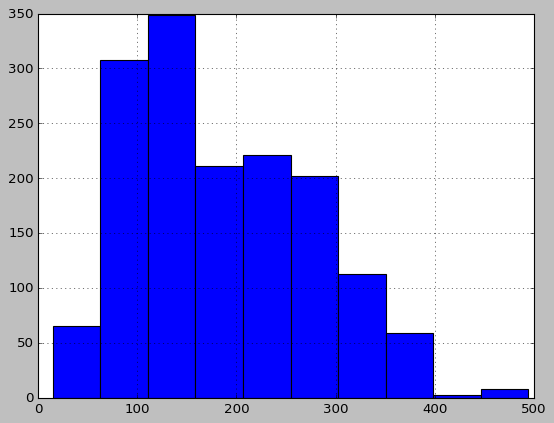

In [27]:
appdat["Days Before the Beginning of Semester "].hist()

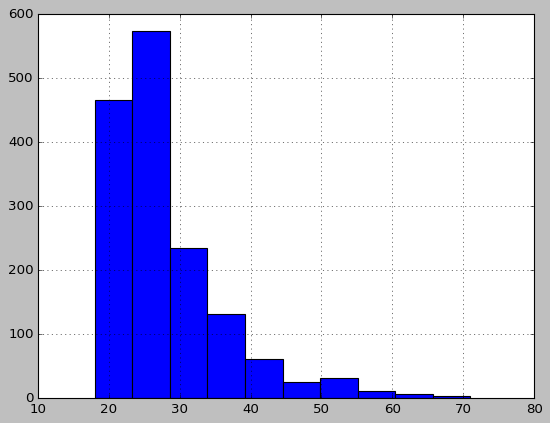

In [28]:
appdat["Age When Applied"].hist()